#### Cell 1 — Import libraries + settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hotel_bookings_cleaned.csv")

print("Shape:", df.shape)
print("Missing values:", df.isna().sum().sum())
print("Duplicates:", df.duplicated().sum())
print("Target values:", df["is_canceled"].value_counts())


Shape: (87375, 44)
Missing values: 0
Duplicates: 0
Target values: is_canceled
Not Canceled    63352
Canceled        24023
Name: count, dtype: int64


#### Cell 2 — Chart 1: Target distribution (Canceled vs Not canceled)

Unmapped values: []


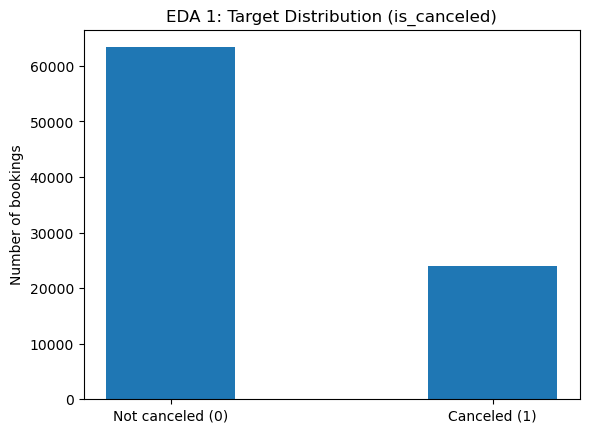

Cancellation rate (%): 27.49


In [2]:
# Make sure text is clean (remove extra spaces)
df["is_canceled"] = df["is_canceled"].astype(str).str.strip()

# Convert to 0/1
df["is_canceled_num"] = df["is_canceled"].map({
    "Not Canceled": 0,
    "Canceled": 1
})

# If there are unexpected values, show them
print("Unmapped values:", df[df["is_canceled_num"].isna()]["is_canceled"].unique())

# Now use numeric column for rate
counts = df["is_canceled_num"].value_counts().sort_index()

plt.bar(["Not canceled (0)", "Canceled (1)"], counts.values, width=0.4)
plt.title("EDA 1: Target Distribution (is_canceled)")
plt.ylabel("Number of bookings")
plt.show()


print("Cancellation rate (%):", round(df["is_canceled_num"].mean() * 100, 2))


#### Cell 3 — Chart 2: Cancellation rate by Hotel type (City vs Resort)

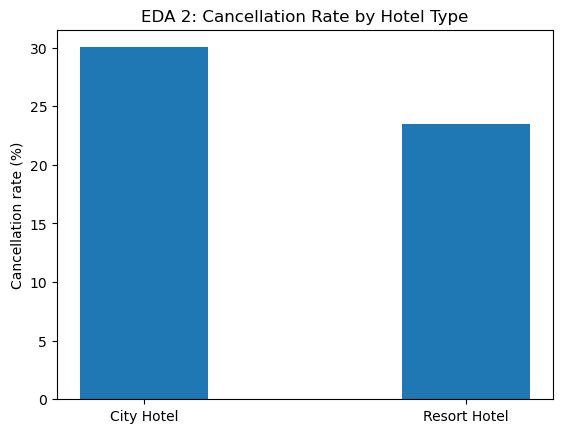

hotel
City Hotel      30.037247
Resort Hotel    23.491811
Name: is_canceled_num, dtype: float64


In [3]:
# Make sure numeric target exists (run once)
df["is_canceled"] = df["is_canceled"].astype(str).str.strip()
df["is_canceled_num"] = df["is_canceled"].map({"Not Canceled": 0, "Canceled": 1})

# Cancellation rate by hotel type (%)
hotel_cancel = (df.groupby("hotel")["is_canceled_num"]
                  .mean()
                  .sort_values(ascending=False) * 100)

plt.bar(hotel_cancel.index, hotel_cancel.values, width=0.4)
plt.title("EDA 2: Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation rate (%)")
plt.show()

print(hotel_cancel)



#### Cell 4 — Chart 3: Lead time vs cancellation (grouped)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3596\376924761.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = df.groupby("lead_time_group")["is_canceled_num"].mean() * 100


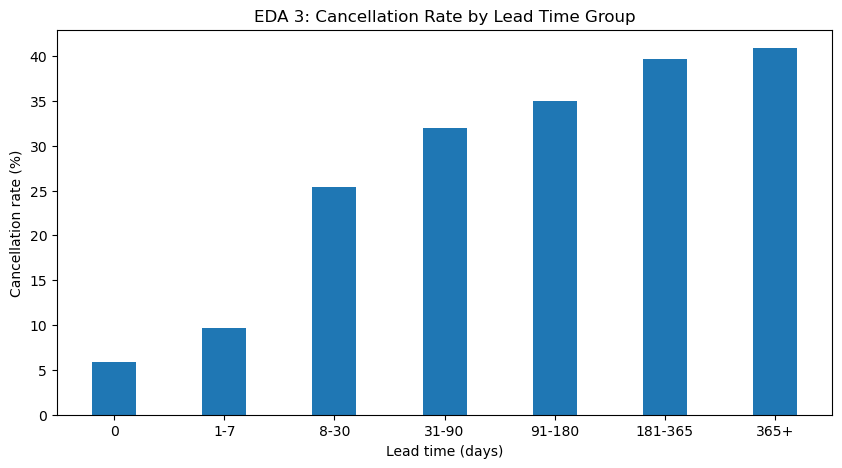

lead_time_group
0           5.910918
1-7         9.658307
8-30       25.374962
31-90      32.005277
91-180     34.983281
181-365    39.682114
365+       40.884956
Name: is_canceled_num, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure numeric target exists (run once)
df["is_canceled"] = df["is_canceled"].astype(str).str.strip()
df["is_canceled_num"] = df["is_canceled"].map({"Not Canceled": 0, "Canceled": 1})

# Create lead time groups
bins = [-1, 0, 7, 30, 90, 180, 365, 999999]
labels = ["0", "1-7", "8-30", "31-90", "91-180", "181-365", "365+"]

df["lead_time_group"] = pd.cut(df["lead_time"], bins=bins, labels=labels)

# Use numeric column for mean
lead_cancel = df.groupby("lead_time_group")["is_canceled_num"].mean() * 100

plt.figure(figsize=(10,5))
plt.bar(lead_cancel.index.astype(str), lead_cancel.values, width=0.4)
plt.title("EDA 3: Cancellation Rate by Lead Time Group")
plt.ylabel("Cancellation rate (%)")
plt.xlabel("Lead time (days)")
plt.show()

print(lead_cancel)



#### Deposit type vs cancellation

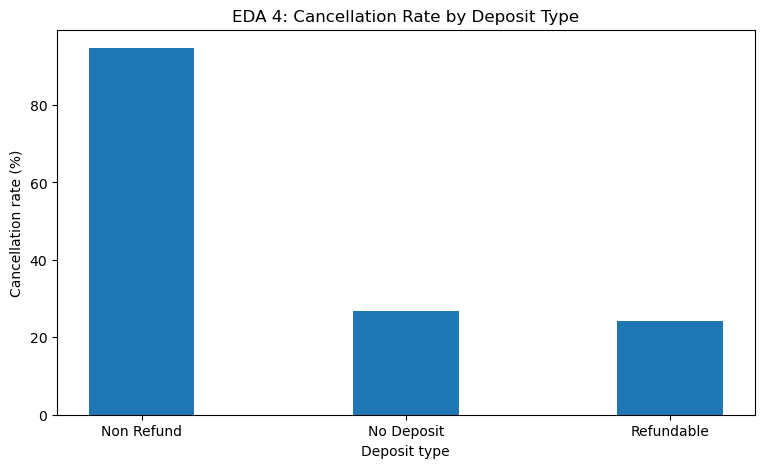

deposit_type
Non Refund    94.696239
No Deposit    26.689937
Refundable    24.299065
Name: is_canceled_num, dtype: float64


In [5]:
import matplotlib.pyplot as plt

# Ensure numeric target exists (run once)
df["is_canceled"] = df["is_canceled"].astype(str).str.strip()
df["is_canceled_num"] = df["is_canceled"].map({"Not Canceled": 0, "Canceled": 1})

# Cancellation rate by deposit type (%)
dep = (df.groupby("deposit_type")["is_canceled_num"]
         .mean()
         .sort_values(ascending=False) * 100)

plt.figure(figsize=(9,5))
plt.bar(dep.index.astype(str), dep.values, width=0.4)
plt.title("EDA 4: Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation rate (%)")
plt.xlabel("Deposit type")
plt.show()

print(dep)


In [6]:
df.to_csv("hotel_bookings_for_powerbi.csv", index=False)